In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# fashion_mnist : 60,000개의 훈련 데이터와 10,000개의 테스트 데이터, 흑백(1개의 면), 28행, 28열

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0  #정규화 : 개수(-1: 갯수지정하지 않음),행,열,면

train_scaled, val_scale, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
# CNN(합성곱) 신경망 만들기 Conv -> Relu -> Pooling

model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', input_shape=(28, 28, 1), activation='relu')) 
# 개별필터 크기 : kernel_size
# input_shape : 행, 열, 면
# 최근에 relu 가 선호되는 이유는 
# sigmoid는 나올 수 있는 최솟값이 0,  최대값은 1 미만이기에 오차역전파법으로 층을 거칠 때 마다 값이 과도하게 적어져서
# 더 이상 성능 개선율이 떨어지기 때문이다.

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2))) # AveragePooling2D() pooling = dropout 



In [5]:
# 완전 연결형
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units = 100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(units = 10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 100)               627300    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                        

In [9]:
# 모델 컴파일 훈련

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [10]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) # patience = 2 : 최저값에서 두번 더 진행, restore_best_weights: 최저값

# 학습과정에서 검증단계 동시진행 
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scale, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 13s 8ms/step - loss: 1.0866 - accuracy: 0.5221 - val_loss: 0.7565 - val_accuracy: 0.6403
Epoch 2/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.6657 - accuracy: 0.7312 - val_loss: 0.4213 - val_accuracy: 0.8659
Epoch 3/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.4371 - accuracy: 0.8569 - val_loss: 0.3396 - val_accuracy: 0.8861
Epoch 4/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3762 - accuracy: 0.8780 - val_loss: 0.3262 - val_accuracy: 0.8911
Epoch 5/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3368 - accuracy: 0.8890 - val_loss: 0.3134 - val_accuracy: 0.8942
Epoch 6/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3159 - accuracy: 0.8965 - val_loss: 0.2950 - val_accuracy: 0.9011
Epoch 7/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2924 - accuracy: 0.9044 - val_loss: 0.2931 - val_ac

<function matplotlib.pyplot.show(close=None, block=None)>

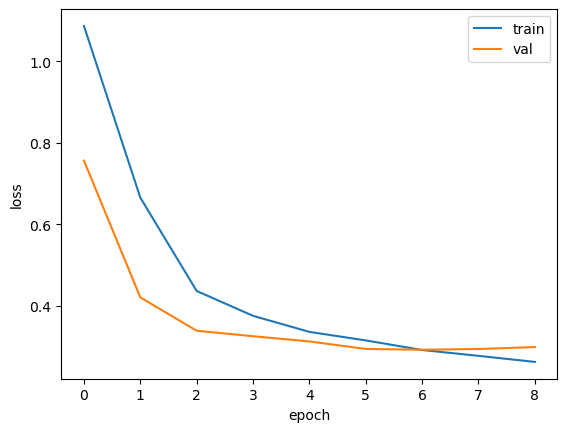

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show

In [13]:
#Conv 2배로
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0  #정규화 : 개수(-1: 갯수지정하지 않음),행,열,면

train_scaled, val_scale, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding = 'same', input_shape=(28, 28, 1), activation='relu')) 

model.add(keras.layers.MaxPooling2D(pool_size=(2, 2))) # AveragePooling2D() pooling = dropout 

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units = 100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(units = 10, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) # patience = 2 : 최저값에서 두번 더 진행, restore_best_weights: 최저값

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scale, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 100)               1254500   
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                      

<function matplotlib.pyplot.show(close=None, block=None)>

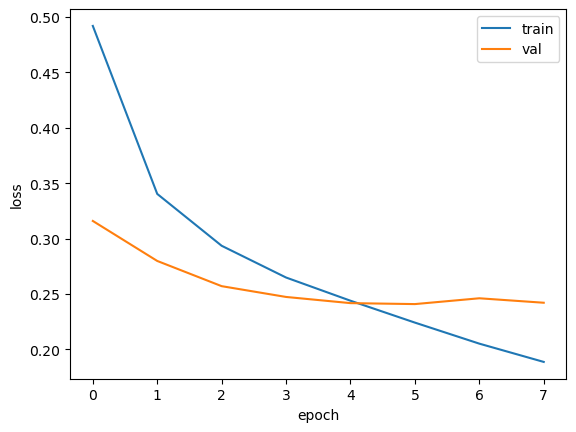

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show